### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Display the data set information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# Get unique values for each Columns
for col in data.columns:
    tabSize = ''
    tabSize += ' ' * (20 - len(col.strip()))
    print("----------------\n", "\033[1m" + col.strip() + ": \033[0m", tabSize, data[col].unique());

----------------
 destination:            ['No Urgent Place' 'Home' 'Work']
----------------
 passanger:              ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
----------------
 weather:                ['Sunny' 'Rainy' 'Snowy']
----------------
 temperature:            [55 80 30]
----------------
 time:                   ['2PM' '10AM' '6PM' '7AM' '10PM']
----------------
 coupon:                 ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
----------------
 expiration:             ['1d' '2h']
----------------
 gender:                 ['Female' 'Male']
----------------
 age:                    ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
----------------
 maritalStatus:          ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
----------------
 has_children:           [1 0]
----------------
 education:              ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#List the % of null values for columns that have null values
null_columns_percent = data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]
print("\033[1m Columns with null values(nan in data): \033[0m \n", null_columns_percent)

 Columns with null values(nan in data):  
 car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
dtype: float64


### car has 99% of null values
    Even the values 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'  'Car that is too old to install Onstar :D'
    Does not seem very useful. 
    So, dropping the column. 
### Before dropping the car column, will further review the other columns that have null values to explore the impact of nulls for these values.

In [7]:
# Review the dates for visit count of restaurant type columns has null value and coupon values matches the restaurant type 
# Example - Check how many null values for Bar calumn when the coupon value is Bar
data_coupon_bar_null                       = data.query('coupon=="Bar"').query('Bar != Bar')
data_coupon_coffeeHouse_null               = data.query('coupon=="Coffee House"').query('CoffeeHouse != CoffeeHouse')
data_coupon_carryAway_null                 = data.query('coupon=="Carry out & Take away"').query('CarryAway != CarryAway')
data_coupon_restaurantLessThan20_null     = data.query('coupon=="Restaurant(<20)"').query('RestaurantLessThan20 != RestaurantLessThan20')
data_coupon_restaurant20To50_null          = data.query('coupon=="Restaurant(20-50)"').query('Restaurant20To50 != Restaurant20To50')

# Counting the total number of rows visit count of restaurant type columns has null value and coupon values matches the restaurant type 
data_coupon_matching_restaurant_null_count = len(data_coupon_bar_null) + len(data_coupon_coffeeHouse_null) + len(data_coupon_carryAway_null) + len(data_coupon_restaurantLessThan20_null)+ len(data_coupon_restaurant20To50_null) 

print('Total number of drivers with null for visit count of a restaurant type with coupon offered matches the restaurant type is: ', data_coupon_matching_restaurant_null_count)


Total number of drivers with null for visit count of a restaurant type with coupon offered matches the restaurant type is:  164


### There are 164 rows when the restaurant type value is null and the coupon matching the restaurant type
    164 out of 12684 
    Deleting these rows as we need to analyze if the member will accept coupon and not knowing if we don’t know the info if the driver visited the type of restaurant 
##### As described in previous steps, we will also drop the car column

In [8]:
# droping the rows with coupon value is Bar and the Bar column value is null from the full data
data_droped_rows = data[~data.isin(data_coupon_bar_null)].dropna(how = 'all')
# further droping the rows with coupon value is Coffee House and the CoffeeHouse column value is null
data_droped_rows = data_droped_rows[~data_droped_rows.isin(data_coupon_coffeeHouse_null)].dropna(how = 'all')
# further droping the rows with coupon value is Carry out & Take away and the CarryAway column value is null
data_droped_rows = data_droped_rows[~data_droped_rows.isin(data_coupon_carryAway_null)].dropna(how = 'all')
# further droping the rows with coupon value is Restaurant(<20) and the RestaurantLessThan20 column value is null
data_droped_rows = data_droped_rows[~data_droped_rows.isin(data_coupon_restaurantLessThan20_null)].dropna(how = 'all')
# further droping the rows with coupon value is Restaurant(20-50) and the Restaurant20To50 column value is null
data_droped_rows = data_droped_rows[~data_droped_rows.isin(data_coupon_restaurant20To50_null)].dropna(how = 'all')
data_cleaned = data_droped_rows.drop(columns=['car'])


#print the info of the cleaned up data
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12520 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12520 non-null  object 
 1   passanger             12520 non-null  object 
 2   weather               12520 non-null  object 
 3   temperature           12520 non-null  float64
 4   time                  12520 non-null  object 
 5   coupon                12520 non-null  object 
 6   expiration            12520 non-null  object 
 7   gender                12520 non-null  object 
 8   age                   12520 non-null  object 
 9   maritalStatus         12520 non-null  object 
 10  has_children          12520 non-null  float64
 11  education             12520 non-null  object 
 12  occupation            12520 non-null  object 
 13  income                12520 non-null  object 
 14  Bar                   12467 non-null  object 
 15  CoffeeHouse        

### We are going to start visualizations, creating, and executing some routines that will be used later in the notebook

In [9]:
#We are going to start vizulizations, creating and executing routines that will reused for various vizulizations 

# Set the image size to in this note book
sns.set(rc={'figure.figsize':(15,8)})

# Function to calculate percentages for the bars in count plot
def percent_display(plot_img, dataFrame, xDivider, yDivider):
    for p in plot_img.patches:
        #Calculate the percentage based on the total and bar height
        percentage = round( 100 * p.get_height()/dataFrame.shape[0], 2)
        # Calculating the X and Y coordinates on the map to position the percentage
        x = p.get_x() + p.get_width()/xDivider
        y =p.get_height() /yDivider
        plot_img.annotate(percentage, (x, y), color = "White")


4. What proportion of the total observations chose to accept the coupon? 



% of drivers accepted coupon: 0.57


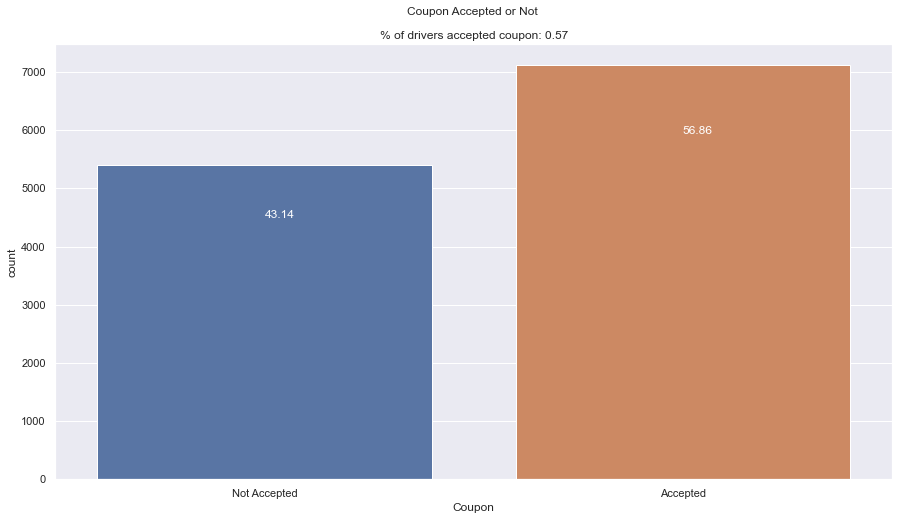

In [11]:
# Print the % of drivers accepted coupon
percent_accepted_str = "% of drivers accepted coupon: "  + str(round(data_cleaned.query("Y == 1").shape[0]/data_cleaned.shape[0],2))
print(percent_accepted_str)
#plt.figure(figsize=(15,8))
coupon_count_img = sns.countplot(x=data_cleaned["Y"])
plt.title('Coupon Accepted or Not \n\n'+ percent_accepted_str)
coupon_count_img.set_xticks([0.0,1.0])
coupon_count_img.set_xticklabels(['Not Accepted','Accepted'])
plt.xlabel('Coupon')
#Call the method to calculate and percentages
percent_display(coupon_count_img, data_cleaned, 2, 1.2)
plt.show()



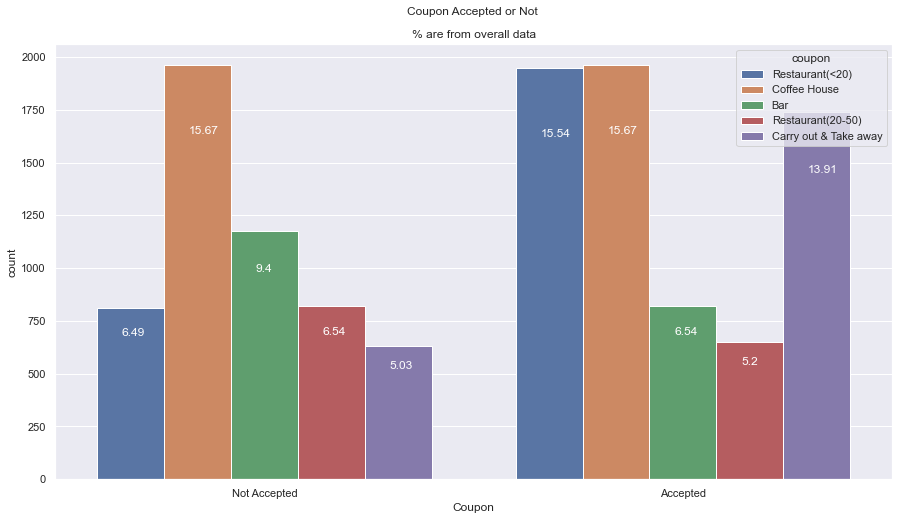

In [12]:
# Print the % of drivers accepted coupon based on coupon type

coupon_type_count_img = sns.countplot(data=data_cleaned, x="Y", hue='coupon')
plt.title('Coupon Accepted or Not \n\n% are from overall data')
plt.xlabel('Coupon')
coupon_type_count_img.set_xticks([0.0,1.0])
coupon_type_count_img.set_xticklabels(['Not Accepted','Accepted'])
#Call the method to calculate and percentages
percent_display(coupon_type_count_img, data_cleaned, 2.7, 1.2)
plt.show()


5. Use a bar plot to visualize the `coupon` column.

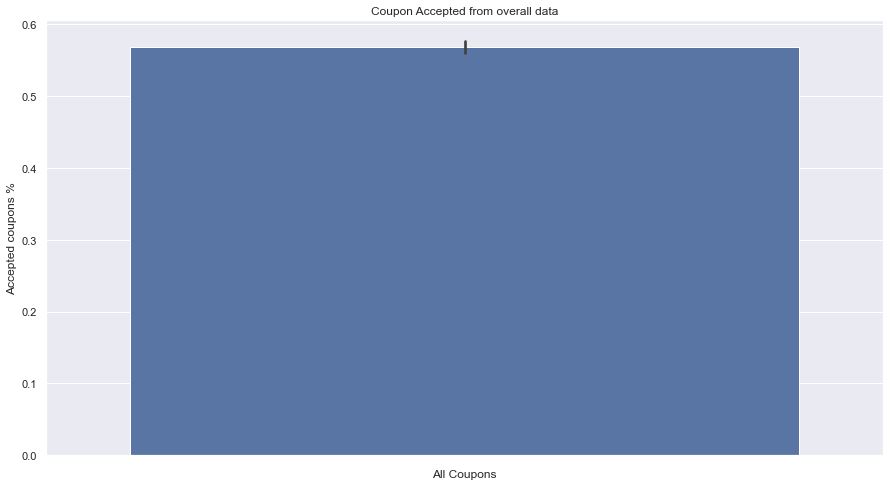

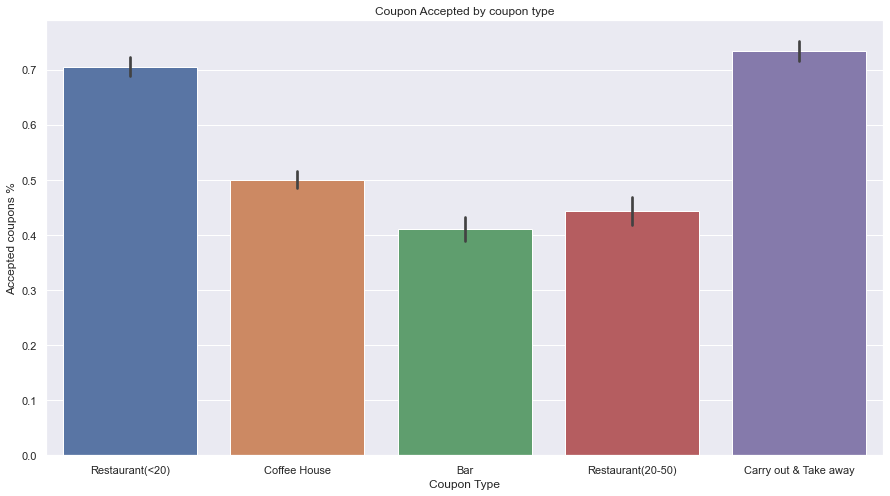

In [13]:
#Bar plot to show overall % of coupon accepted. 
plt.title('Coupon Accepted from overall data')
sns.barplot(data=data_cleaned,y ='Y')
plt.ylabel("Accepted coupons %")
plt.xlabel("All Coupons")
plt.show()
print('\n\n')
#Bar plot to show coupon accepted rate based on coupon type
plt.title('Coupon Accepted by coupon type')
sns.barplot(data=data_cleaned,y ='Y', x='coupon')
plt.ylabel("Accepted coupons %")
plt.xlabel("Coupon Type")
plt.show()

6. Use a histogram to visualize the temperature column.

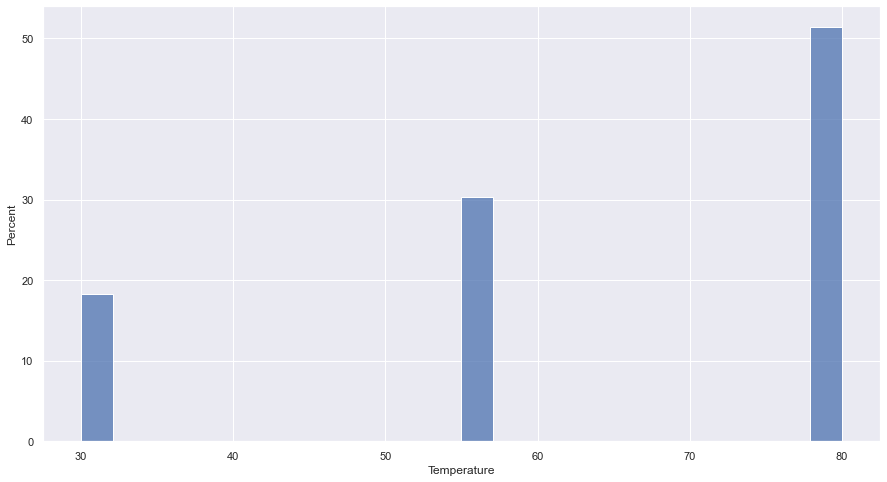

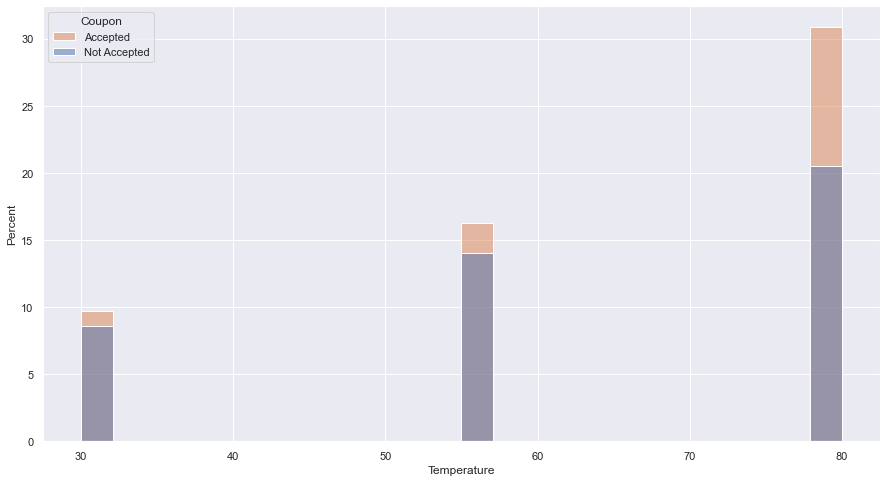

In [14]:
#histogram to visualize the temperature column
plt.xlabel('Temperature')
temp_hist_img = sns.histplot(data_cleaned, x="temperature", stat='percent')
#sns.move_legend(temp_hist_img, "upper left")
plt.show()


#histogram to visualize the temperature column grouped if accepted or not
plt.xlabel('Temperature')
temp_hist_img = sns.histplot(data_cleaned, x="temperature", hue="Y", stat='percent')
plt.legend(labels = ['Accepted', 'Not Accepted'], title='Coupon')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
# Create a DataFrame with the just the bar coupon.
# Resetting the index so futher data slicing can be done with out getting SettingWithCopyWarning error
data_cleaned_bar=data_cleaned.loc[data_cleaned['coupon']=='Bar'].reset_index(drop = True)
#data_cleaned_bar = data.query('coupon=="Bar"')
data_cleaned_bar.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           1996 non-null   object 
 1   passanger             1996 non-null   object 
 2   weather               1996 non-null   object 
 3   temperature           1996 non-null   float64
 4   time                  1996 non-null   object 
 5   coupon                1996 non-null   object 
 6   expiration            1996 non-null   object 
 7   gender                1996 non-null   object 
 8   age                   1996 non-null   object 
 9   maritalStatus         1996 non-null   object 
 10  has_children          1996 non-null   float64
 11  education             1996 non-null   object 
 12  occupation            1996 non-null   object 
 13  income                1996 non-null   object 
 14  Bar                   1996 non-null   object 
 15  CoffeeHouse          

2. What proportion of bar coupons were accepted?


% of drivers accepted bar coupon: 0.4103206412825651


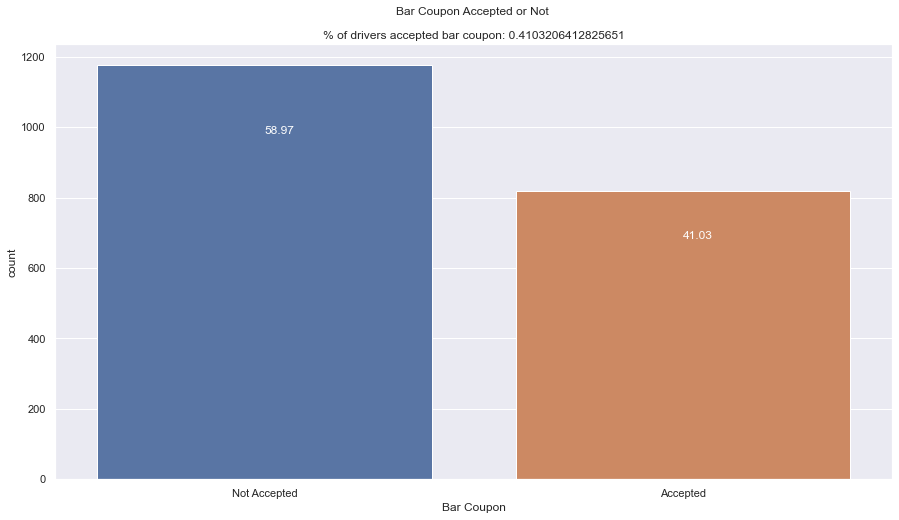

In [16]:
# Print the % of drivers accepted bar coupon
percent_accepted_str = "% of drivers accepted bar coupon: "  + str(data_cleaned_bar.query("Y == 1").shape[0]/data_cleaned_bar.shape[0])
print(percent_accepted_str)
#plt.figure(figsize=(15,8))
coupon_count_img = sns.countplot(x=data_cleaned_bar["Y"])
plt.title('Bar Coupon Accepted or Not \n\n'+ percent_accepted_str)
coupon_count_img.set_xticks([0.0,1.0])
coupon_count_img.set_xticklabels(['Not Accepted','Accepted'])
plt.xlabel('Bar Coupon')
#Call the method to calculate and percentages
percent_display(coupon_count_img, data_cleaned_bar, 2, 1.2)
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [17]:
# Creating a new column to indicate if the driver visitied a bar more than 3 times or not. 
data_cleaned_bar['MoreThan3BarVisit'] = np.where(data_cleaned_bar['Bar'].isin(['gt8', '4~8']), 1.0, 0.0)

In [18]:
#Number of driver offered Bar coupon and have visited a bar more than 3 times 
count_bar_greater_than_3_vists = data_cleaned_bar.query('MoreThan3BarVisit == 1.0').shape[0]
#Number of driver offered Bar coupon and have visited a bar 3 or less times 
count_bar_3_or_less_vists = data_cleaned_bar.query('MoreThan3BarVisit == 0.0').shape[0]

#Number of driver accepted Bar coupon and have visited a bar more than 3 times 
count_bar_greater_than_3_vists_coupon_accepted = data_cleaned_bar.query('MoreThan3BarVisit == 1.0 and Y==1.0' ).shape[0]
#Number of driver accepted Bar coupon and have visited a bar more 3 or less times
count_bar_3_or_less_vists_coupon_accepted = data_cleaned_bar.query('MoreThan3BarVisit == 0.0 and Y==1.0').shape[0]

#Percent of drivers visited a bar more than 3 times and accepted a coupon
percent_bar_greater_than_3_vists_coupon_accepted = (count_bar_greater_than_3_vists_coupon_accepted/count_bar_greater_than_3_vists)* 100
#Percent of driver accepted Bar coupon and have visited a bar more 3 or less times
percent_bar_3_or_less_vists_coupon_accepted = (count_bar_3_or_less_vists_coupon_accepted/count_bar_3_or_less_vists) * 100

print("Number of drivers offered the Bar coupon who visited a Bar more than 3 times:      ", count_bar_greater_than_3_vists)
print("Number of drivers offered the Bar coupon who visited a Bar 3 or less times:        ", count_bar_3_or_less_vists)
print("Number of drivers who visited a Bar more than 3 times and accepted the Bar coupon: ", count_bar_greater_than_3_vists_coupon_accepted)
print("Number of drivers who visited a Bar 3 or less times and accepted the Bar:          ", count_bar_3_or_less_vists_coupon_accepted)
print("Percent of drivers who visited a Bar 3 or less times and accepted the Bar:         ", round(percent_bar_greater_than_3_vists_coupon_accepted,2))
print("Percent of drivers accepted Bar coupon who visited a Bar 3 or less times:          ", round(percent_bar_3_or_less_vists_coupon_accepted,2))

print('\n\n')
print('\033[1m' +'Data indicates' + ': \033[0m')
print("\t", "Bar coupons are offered 10 times more to drivers who visit a bar 3 or less times.")
print("\t", "Number of drivers who visited a bar 3 or less number of times have accepted the coupon 4 times more than the drivers who visit a bar more than 3 times.")
print("\t", "But drivers who visit a bar more than 3 times are likely to accept the coupon by two times than compared to the drivers who visit the bar 3 or less times")


Number of drivers offered the Bar coupon who visited a Bar more than 3 times:       199
Number of drivers offered the Bar coupon who visited a Bar 3 or less times:         1797
Number of drivers who visited a Bar more than 3 times and accepted the Bar coupon:  153
Number of drivers who visited a Bar 3 or less times and accepted the Bar:           666
Percent of drivers who visited a Bar 3 or less times and accepted the Bar:          76.88
Percent of drivers accepted Bar coupon who visited a Bar 3 or less times:           37.06



Data indicates: 
	 Bar coupons are offered 10 times more to drivers who visit a bar 3 or less times.
	 Number of drivers who visited a bar 3 or less number of times have accepted the coupon 4 times more than the drivers who visit a bar more than 3 times.
	 But drivers who visit a bar more than 3 times are likely to accept the coupon by two times than compared to the drivers who visit the bar 3 or less times


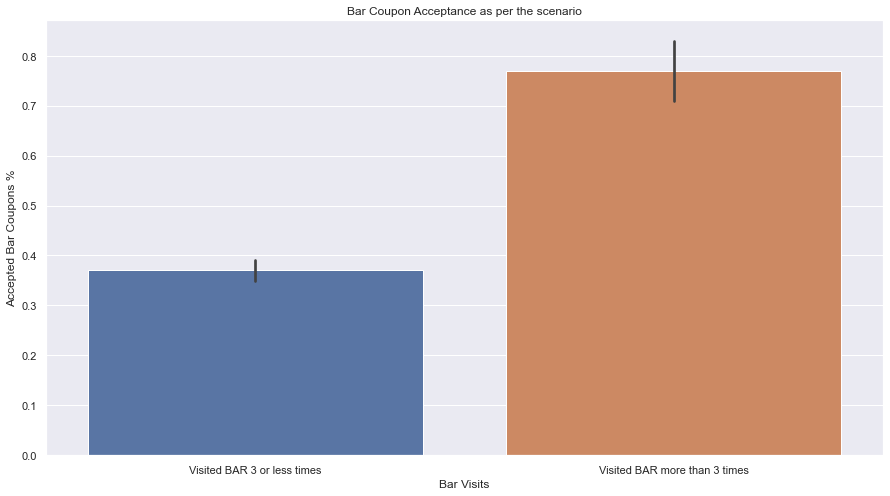

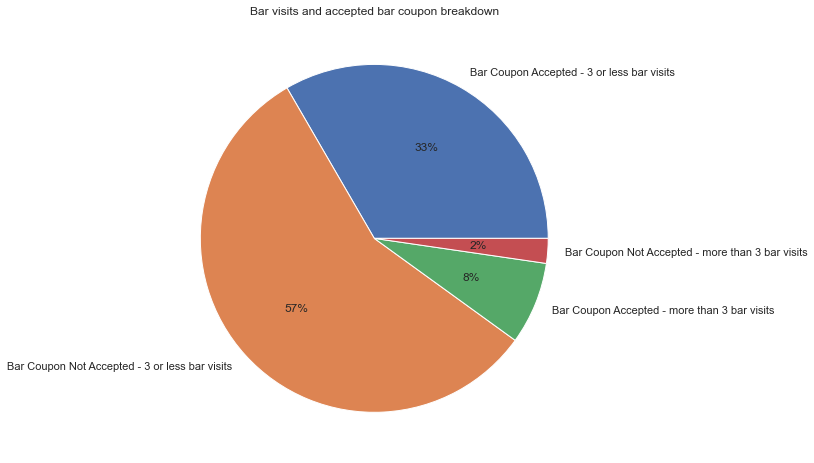

In [21]:
#Vizulizing the same using bar plot
plt.title('Bar Coupon Acceptance as per the scenario')
bar_accepted_by_visits_plot = sns.barplot(data=data_cleaned_bar, x='MoreThan3BarVisit', y ='Y')
bar_accepted_by_visits_plot.set_xticks([0.0,1.0])
bar_accepted_by_visits_plot.set_xticklabels(['Visited BAR 3 or less times','Visited BAR more than 3 times'])
#coupon_type_count_img = sns.countplot(data=data_cleaned_bar, x='3orMoreBarVisit', hue='Y')
plt.ylabel("Accepted Bar Coupons %")
plt.xlabel("Bar Visits")
plt.show()
print('\n\n')
#Vizulizing the same using pie chart
plt.title('Bar visits and accepted bar coupon breakdown')
bar_accepted_data = [count_bar_3_or_less_vists_coupon_accepted, count_bar_3_or_less_vists - count_bar_3_or_less_vists_coupon_accepted, count_bar_greater_than_3_vists_coupon_accepted, count_bar_greater_than_3_vists - count_bar_greater_than_3_vists_coupon_accepted]
bar_accepted_labels = ['Bar Coupon Accepted - 3 or less bar visits', 'Bar Coupon Not Accepted - 3 or less bar visits', 'Bar Coupon Accepted - more than 3 bar visits', 'Bar Coupon Not Accepted - more than 3 bar visits']
plt.pie(bar_accepted_data, labels = bar_accepted_labels, autopct='%.0f%%')

plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [22]:
# Creating a new column to indicate if the driver visitied altleast once and older than 25 
data_cleaned_bar['OverAge25VisitedBar'] = np.where(data_cleaned_bar['Bar'].isin(['gt8', '4~8', '1~3']) & data_cleaned_bar['age'].isin(['46', '26', '31', '41', '50plus', '36']), 1.0, 0.0)
data_cleaned_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           1996 non-null   object 
 1   passanger             1996 non-null   object 
 2   weather               1996 non-null   object 
 3   temperature           1996 non-null   float64
 4   time                  1996 non-null   object 
 5   coupon                1996 non-null   object 
 6   expiration            1996 non-null   object 
 7   gender                1996 non-null   object 
 8   age                   1996 non-null   object 
 9   maritalStatus         1996 non-null   object 
 10  has_children          1996 non-null   float64
 11  education             1996 non-null   object 
 12  occupation            1996 non-null   object 
 13  income                1996 non-null   object 
 14  Bar                   1996 non-null   object 
 15  CoffeeHouse          

In [23]:
#Number of driver offered Bar coupon who is over 25 year of age and visited a bar at least once
count_over_Age25_visited_bar = data_cleaned_bar.query('OverAge25VisitedBar == 1.0').shape[0]

#Number of driver offered Bar coupon who is not over 25 year of age or not visited a bar
count_Age25orLess_or_not_visited_bar = data_cleaned_bar.query('OverAge25VisitedBar == 0.0').shape[0]

#Number of driver who accepted Bar coupon and is over 25 year of age and visited a bar at least once
count_over_Age25_visited_bar_coupon_accepted = data_cleaned_bar.query('OverAge25VisitedBar == 1.0 and Y==1.0' ).shape[0]
#Number of driver who accepted Bar coupon and who is not over 25 year of age or not visited a bar
count_Age25orLess_or_not_visited_bar_coupon_accepted = data_cleaned_bar.query('OverAge25VisitedBar == 0.0 and Y==1.0').shape[0]

#Percent of driver who accepted Bar coupon and is over 25 year of age and visited a bar at least once
percent_over_Age25_visited_bar_coupon_accepted = (count_over_Age25_visited_bar_coupon_accepted/count_over_Age25_visited_bar)* 100
#Percent of driver who accepted Bar coupon and who is not over 25 year of age or not visited a bar
percent_Age25orLess_or_not_visited_bar_coupon_accepted = (count_Age25orLess_or_not_visited_bar_coupon_accepted/count_Age25orLess_or_not_visited_bar) * 100

print("Number of driers offered Bar coupon who is over 25 year of age and visited a bar at least once:       ", count_over_Age25_visited_bar)
print("Number of drivers offered Bar coupon who is not over 25 year of age or not visited a bar:              ", count_Age25orLess_or_not_visited_bar)
print("Number of drivers who accepted Bar coupon and is over 25 year of age and visited a bar at least once:  ", count_over_Age25_visited_bar_coupon_accepted)
print("Number of drivers who accepted Bar coupon and who is not over 25 year of age or not visited a bar:     ", count_Age25orLess_or_not_visited_bar_coupon_accepted)
print("Percent of drivers who accepted Bar coupon and is over 25 year of age and visited a bar at least once: ", round(percent_over_Age25_visited_bar_coupon_accepted,2))
print("Percent of drivers who accepted Bar coupon and who is not over 25 year of age or not visited a bar:    ", round(percent_Age25orLess_or_not_visited_bar_coupon_accepted,2))
print('\n\n')
print('\033[1m' +'Data indicates' + ': \033[0m')
print("\t", "Bar coupon offered 3 times less to driver who are over 25 and visited bar at least once.")
print("\t", "The number of drivers who are 25 or under and who did not visit a bar have accepted the coupon 4 times more.")
print("\t", "But drivers who are over 25 and visits a bar are 2 times more likely to accept the coupon.")


Number of driers offered Bar coupon who is over 25 year of age and visited a bar at least once:        420
Number of drivers offered Bar coupon who is not over 25 year of age or not visited a bar:               1576
Number of drivers who accepted Bar coupon and is over 25 year of age and visited a bar at least once:   292
Number of drivers who accepted Bar coupon and who is not over 25 year of age or not visited a bar:      527
Percent of drivers who accepted Bar coupon and is over 25 year of age and visited a bar at least once:  69.52
Percent of drivers who accepted Bar coupon and who is not over 25 year of age or not visited a bar:     33.44



Data indicates: 
	 Bar coupon offered 3 times less to driver who are over 25 and visited bar at least once.
	 The number of drivers who are 25 or under and who did not visit a bar have accepted the coupon 4 times more.
	 But drivers who are over 25 and visits a bar are 2 times more likely to accept the coupon.


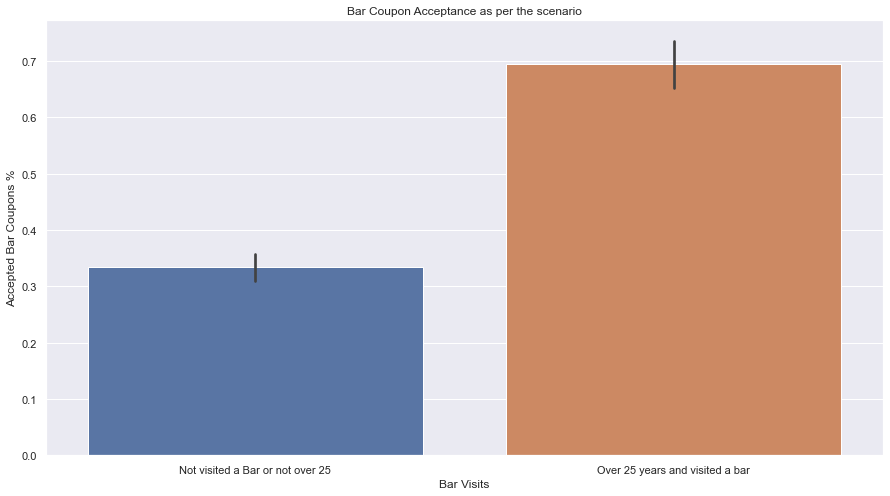

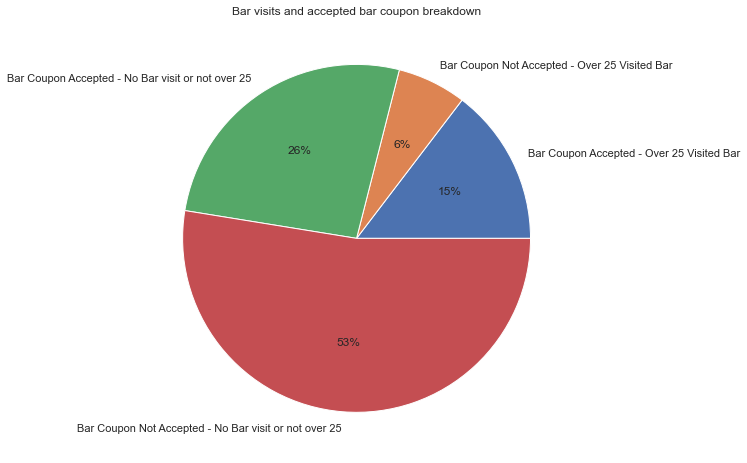

In [24]:
#Vizulizing the same using bar plot
plt.title('Bar Coupon Acceptance as per the scenario')
bar_accepted_by_visits_plot = sns.barplot(data=data_cleaned_bar, x='OverAge25VisitedBar', y ='Y')
bar_accepted_by_visits_plot.set_xticks([0.0,1.0])
bar_accepted_by_visits_plot.set_xticklabels(['Not visited a Bar or not over 25', 'Over 25 years and visited a bar'])
plt.ylabel("Accepted Bar Coupons %")
plt.xlabel("Bar Visits")
plt.show()
print('\n\n')
#Vizulizing the same using pie chart
plt.title('Bar visits and accepted bar coupon breakdown')
bar_accepted_data = [count_over_Age25_visited_bar_coupon_accepted, 
                     count_over_Age25_visited_bar - count_over_Age25_visited_bar_coupon_accepted, 
                     count_Age25orLess_or_not_visited_bar_coupon_accepted, 
                     count_Age25orLess_or_not_visited_bar - count_Age25orLess_or_not_visited_bar_coupon_accepted]
bar_accepted_labels = ['Bar Coupon Accepted - Over 25 Visited Bar', 'Bar Coupon Not Accepted - Over 25 Visited Bar', 'Bar Coupon Accepted - No Bar visit or not over 25', 'Bar Coupon Not Accepted - No Bar visit or not over 25']
plt.pie(bar_accepted_data, labels = bar_accepted_labels, autopct='%.0f%%')

plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [25]:
# function that take the value for bar, passanger and occupation
# Return 1.0 if bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
def BarScenarioFive(bar, passanger, occupation):
    matches = False 
    if ( bar in (['1~3', 'gt8', '4~8'])
        and passanger in (['Friend(s)','Partner'])
        and occupation not in (['Farming Fishing & Forestry'])):
            matches = True
    return matches    

#Create a new Column with value of 1.0 if the conditions matches else 0.0
data_cleaned_bar['BarScenarioFive'] = data_cleaned_bar.apply(lambda x: BarScenarioFive(x['Bar'], x['passanger'], x['occupation']), axis=1)

#Group the data by the new column 
data_groupby_Bar_FriPar_FarmFishForest = data_cleaned_bar.groupby('BarScenarioFive')

# Lets get the count 
Count_Bar_FriPar_FarmFishForest = data_groupby_Bar_FriPar_FarmFishForest['Y'].count().reset_index()
# Since the value of accepted is 1.0, summing them will give us the number of rivers accepted the coupon
Accepted_Bar_FriPar_FarmFishForest = data_groupby_Bar_FriPar_FarmFishForest['Y'].sum().reset_index()

#Renaming the Y columns to count and accepted. 
Count_Bar_FriPar_FarmFishForest.rename(columns={'Y': 'count'}, inplace = True)
Accepted_Bar_FriPar_FarmFishForest.rename(columns={'Y': 'accepted'}, inplace = True)

#Merging the two data sets to one.
Bar_FriPar_FarmFishForest = Count_Bar_FriPar_FarmFishForest.merge(Accepted_Bar_FriPar_FarmFishForest, left_on='BarScenarioFive', right_on='BarScenarioFive', how='inner')
Bar_FriPar_FarmFishForest['not accepted'] = Bar_FriPar_FarmFishForest['count'] - Bar_FriPar_FarmFishForest['accepted']
Bar_FriPar_FarmFishForest['percent accepted'] = Bar_FriPar_FarmFishForest['accepted'] / Bar_FriPar_FarmFishForest['count']
print('\033[1m' +'Data Description' + ': \033[0m')
print('\t \033[1m BarScenarioFive: \033[0m drivers who go to bars more than once a month and had passengers that are not kids and had occupations other than farming, fishing, or forestry.')
print('\t \033[1m count: \033[0m Count of Bar coupons offered')
print('\t \033[1m accepted: \033[0m Count of Bar coupons accepted')
print('\t \033[1m not accepted: \033[0m Count of Bar coupons not accepted')
print('\t \033[1m percent accepted: \033[0m Percent of Bar coupons accepted')
print('\n\n')
print(Bar_FriPar_FarmFishForest)
print('\n\n')
print('\033[1m' +'Data indicates' + ': \033[0m')
print('\tBar coupon offered is almost 10 time more to driver who are not matching the scenario')
print('\tNumber of drivers not matching the scenario accepted the coupon is over 4 times the drivers matching scenario')
print('\tBut drivers who matched the scenario are 2 times more likely to accept the coupon compared to the drivers not matching the scenario')

Data Description: 
	  BarScenarioFive:  drivers who go to bars more than once a month and had passengers that are not kids and had occupations other than farming, fishing, or forestry.
	  count:  Count of Bar coupons offered
	  accepted:  Count of Bar coupons accepted
	  not accepted:  Count of Bar coupons not accepted
	  percent accepted:  Percent of Bar coupons accepted



   BarScenarioFive  count  accepted  not accepted  percent accepted
0            False   1801     679.0        1122.0          0.377013
1             True    195     140.0          55.0          0.717949



Data indicates: 
	Bar coupon offered is almost 10 time more to driver who are not matching the scenario
	Number of drivers not matching the scenario accepted the coupon is over 4 times the drivers matching scenario
	But drivers who matched the scenario are 2 times more likely to accept the coupon compared to the drivers not matching the scenario


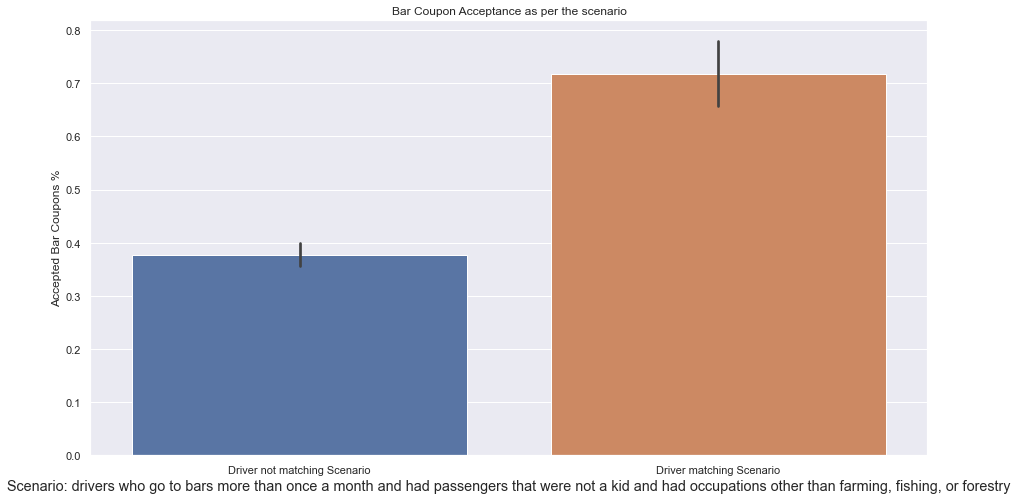

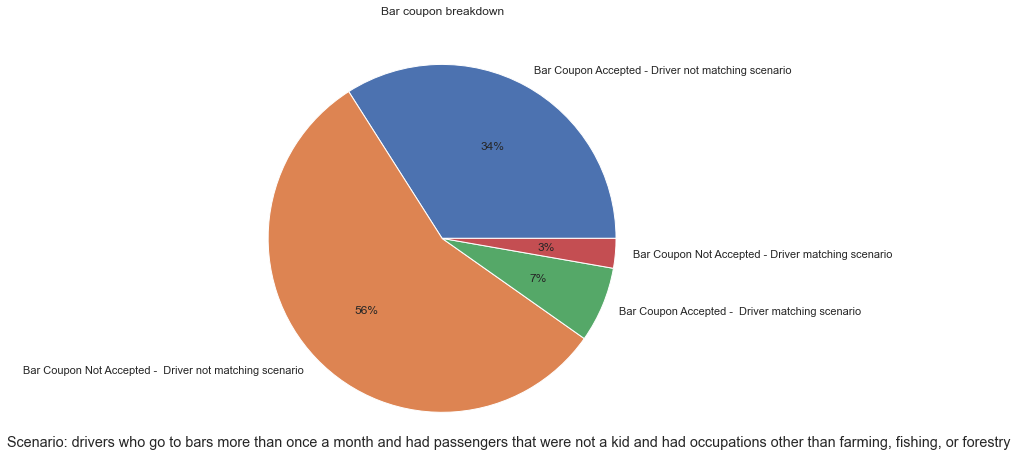

In [26]:
#Vizulizing the same using bar plot
plt.title('Bar Coupon Acceptance as per the scenario')
bar_accepted_by_scenario5_plot = sns.barplot(data=data_cleaned_bar, x='BarScenarioFive', y ='Y')
bar_accepted_by_scenario5_plot.set_xticks([0.0,1.0])
bar_accepted_by_scenario5_plot.set_xticklabels(['Driver not matching Scenario', 'Driver matching Scenario'])
plt.ylabel("Accepted Bar Coupons %")
plt.xlabel("Scenario: drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry", fontsize='large')
plt.show()
print('\n\n')
#Vizulizing the same using pie chart
plt.title('Bar coupon breakdown')
bar_accepted_data = [Bar_FriPar_FarmFishForest.loc[:0, 'accepted'].values[0], 
                     Bar_FriPar_FarmFishForest.loc[:0, 'not accepted'].values[0],
                     Bar_FriPar_FarmFishForest.loc[1:, 'accepted'].values[0], 
                     Bar_FriPar_FarmFishForest.loc[1:, 'not accepted'].values[0]]
bar_accepted_labels = ['Bar Coupon Accepted - Driver not matching scenario', 
                       'Bar Coupon Not Accepted -  Driver not matching scenario', 
                       'Bar Coupon Accepted -  Driver matching scenario', 
                       'Bar Coupon Not Accepted - Driver matching scenario']
bar_accepted_by_scenario5_pie = plt.pie(bar_accepted_data, labels = bar_accepted_labels, autopct='%.0f%%')
plt.text(-2.5,-1.2, "Scenario: drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry", fontsize='large')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [28]:
# function that take the value for bar, passanger and occupation
# Return 1.0 if bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
def BarScenarioSix(bar, passanger, widowed, age, cheapRestaurantVisit, income):
    matches = False 
    if ((bar in (['1~3', 'gt8', '4~8']) and ((passanger in ['Friend(s)', 'Partner'] and widowed not in ['Widowed']) or ( age in ['21','26','below21']))) 
        or (cheapRestaurantVisit in ['4~8', 'gt8'] and income in ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500'])) :
            matches = True
    return matches    

#Create a new Column with value of 1.0 if the conditions matches else 0.0
data_cleaned_bar['BarScenarioSix'] = data_cleaned_bar.apply(lambda x: BarScenarioSix(x['Bar'], 
                                                                                     x['passanger'], 
                                                                                     x['maritalStatus'],
                                                                                     x['age'],
                                                                                     x['RestaurantLessThan20'],
                                                                                     x['income']), axis=1)

#Group the data by the new column 
data_bar_scenario_six_groupby = data_cleaned_bar.groupby('BarScenarioSix')

# Lets get the count 
count_bar_scenario_six = data_bar_scenario_six_groupby['Y'].count().reset_index()
# Since the value of accepted is 1.0, summing them will give us the number of rivers accepted the coupon
accepted_bar_scenario_six = data_bar_scenario_six_groupby['Y'].sum().reset_index()

#Renaming the Y columns to count and accepted. 
count_bar_scenario_six.rename(columns={'Y': 'count'}, inplace = True)
accepted_bar_scenario_six.rename(columns={'Y': 'accepted'}, inplace = True)

#Merging the two data sets to one.
bar_scenario_six = count_bar_scenario_six.merge(accepted_bar_scenario_six, left_on='BarScenarioSix', right_on='BarScenarioSix', how='inner')
bar_scenario_six['not accepted'] = bar_scenario_six['count'] - bar_scenario_six['accepted']
bar_scenario_six['percent accepted'] = bar_scenario_six['accepted'] / bar_scenario_six['count']
print('\033[1m' +'Data Description' + ': \033[0m')
print('\t \033[1m BarScenarioFive: \033[0m Drivers')
print('\t\tgo to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*')
print('\t\tgo to bars more than once a month and are under the age of 30 *OR*')
print('\t\tgo to cheap restaurants more than 4 times a month and income is less than 50K.')
      
print('\t \033[1m count: \033[0m Count of Bar coupons offered')
print('\t \033[1m accepted: \033[0m Count of Bar coupons accepted')
print('\t \033[1m not accepted: \033[0m Count of Bar coupons not accepted')
print('\t \033[1m percent accepted: \033[0m Percent of Bar coupons accepted')
print('\n\n')
print(bar_scenario_six)

print('\n\n')
print('\033[1m' +'Data indicates' + ': \033[0m')
print('\tBar coupon offered is almost 3 time more to driver who are not matching the scenario')
print('\tNumber of drivers not matching the scenario accepted the coupon is over 1.5 times the drivers matching scenario')
print('\tBut drivers who matched the scenario are 2 times more likely to accept the coupon compared to the drivers not matching the scenario')


Data Description: 
	  BarScenarioFive:  Drivers
		go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
		go to bars more than once a month and are under the age of 30 *OR*
		go to cheap restaurants more than 4 times a month and income is less than 50K.
	  count:  Count of Bar coupons offered
	  accepted:  Count of Bar coupons accepted
	  not accepted:  Count of Bar coupons not accepted
	  percent accepted:  Percent of Bar coupons accepted



   BarScenarioSix  count  accepted  not accepted  percent accepted
0           False   1337     442.0         895.0          0.330591
1            True    659     377.0         282.0          0.572079



Data indicates: 
	Bar coupon offered is almost 3 time more to driver who are not matching the scenario
	Number of drivers not matching the scenario accepted the coupon is over 1.5 times the drivers matching scenario
	But drivers who matched the scenario are 2 times more likely to accept the coupon compare

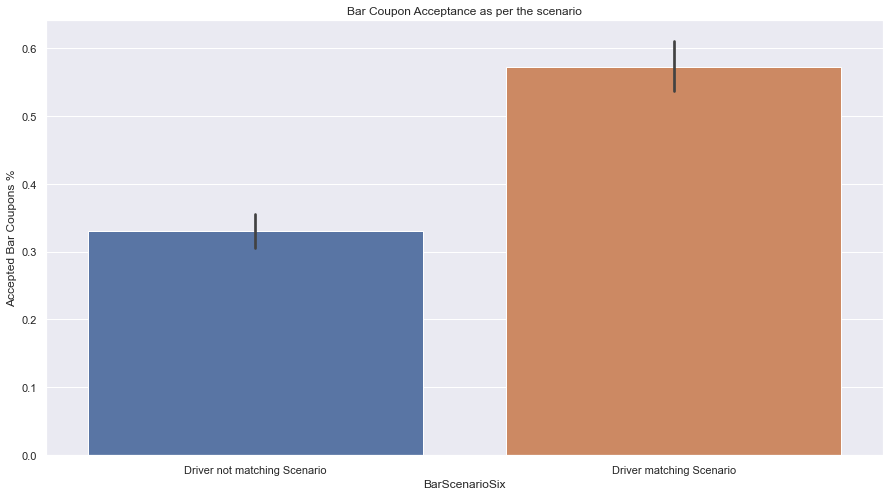

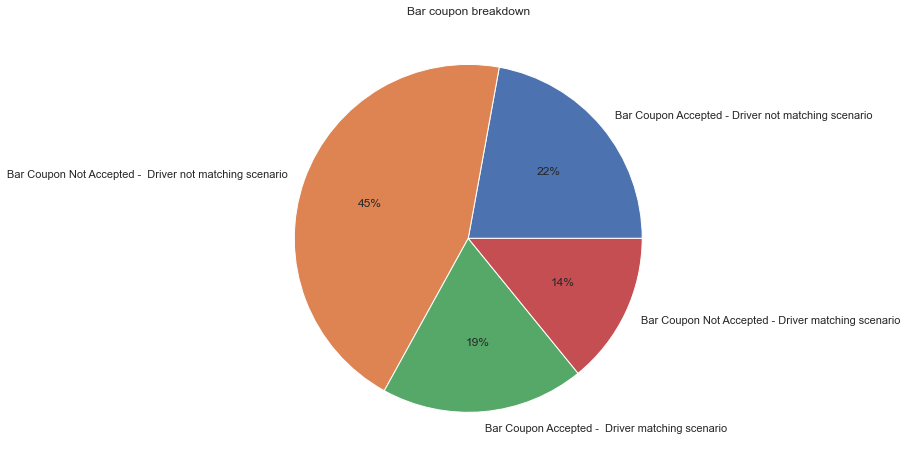

In [29]:
#Vizulizing the same using bar plot
plt.title('Bar Coupon Acceptance as per the scenario')
bar_accepted_by_scenario6_plot = sns.barplot(data=data_cleaned_bar, x='BarScenarioSix', y ='Y')
bar_accepted_by_scenario6_plot.set_xticks([0.0,1.0])
bar_accepted_by_scenario6_plot.set_xticklabels(['Driver not matching Scenario', 'Driver matching Scenario'])
plt.ylabel("Accepted Bar Coupons %")
#plt.xlabel("Scenario: drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry", fontsize='large')
plt.show()
print('\n\n')
#Vizulizing the same using pie chart
plt.title('Bar coupon breakdown')
bar_accepted_data = [bar_scenario_six.loc[:0, 'accepted'].values[0], 
                     bar_scenario_six.loc[:0, 'not accepted'].values[0],
                     bar_scenario_six.loc[1:, 'accepted'].values[0], 
                     bar_scenario_six.loc[1:, 'not accepted'].values[0]]
bar_accepted_labels = ['Bar Coupon Accepted - Driver not matching scenario', 
                       'Bar Coupon Not Accepted -  Driver not matching scenario', 
                       'Bar Coupon Accepted -  Driver matching scenario', 
                       'Bar Coupon Not Accepted - Driver matching scenario']
bar_accepted_by_scenario5_pie = plt.pie(bar_accepted_data, labels = bar_accepted_labels, autopct='%.0f%%')
#plt.text(-2.5,-1.2, "Scenario: drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry", fontsize='large')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Observations
    More number of drivers not matching the driver scenarios have accepted the bar coupon. 
    Bar coupons are offered at a higher percentage to drivers not matching the scenario. 
    Because more coupons are offered to drivers not matching the scenarios, they accepted more and it does not mean drivers not matching the scenarios accepts coupons. 
    Based on all scenarios, ~2/3 of driver matching the scenarios accepted the scenarios and only ~1/3 of drivers not matching the scenario accepted he coupon 
    All the scenarios have one common condition - drivers going to bar at least once in the last month.
    So based on this, 
##### Drivers who visit a bar at least once are twice likely to accept then bar coupon the driver who did not visit a bar

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigating Carry Out

In [30]:
# Create a DataFrame with the just the Coffee House coupon.
# Resetting the index so futher data slicing can be done with out getting SettingWithCopyWarning error
data_cleaned_coffee=data_cleaned.loc[data_cleaned['coupon']=='Coffee House'].reset_index(drop = True)
data_cleaned_coffee.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           3924 non-null   object 
 1   passanger             3924 non-null   object 
 2   weather               3924 non-null   object 
 3   temperature           3924 non-null   float64
 4   time                  3924 non-null   object 
 5   coupon                3924 non-null   object 
 6   expiration            3924 non-null   object 
 7   gender                3924 non-null   object 
 8   age                   3924 non-null   object 
 9   maritalStatus         3924 non-null   object 
 10  has_children          3924 non-null   float64
 11  education             3924 non-null   object 
 12  occupation            3924 non-null   object 
 13  income                3924 non-null   object 
 14  Bar                   3908 non-null   object 
 15  CoffeeHouse          

1. What proportion of coffee coupons were accepted?

% of drivers accepted coffee house coupon: 0.5


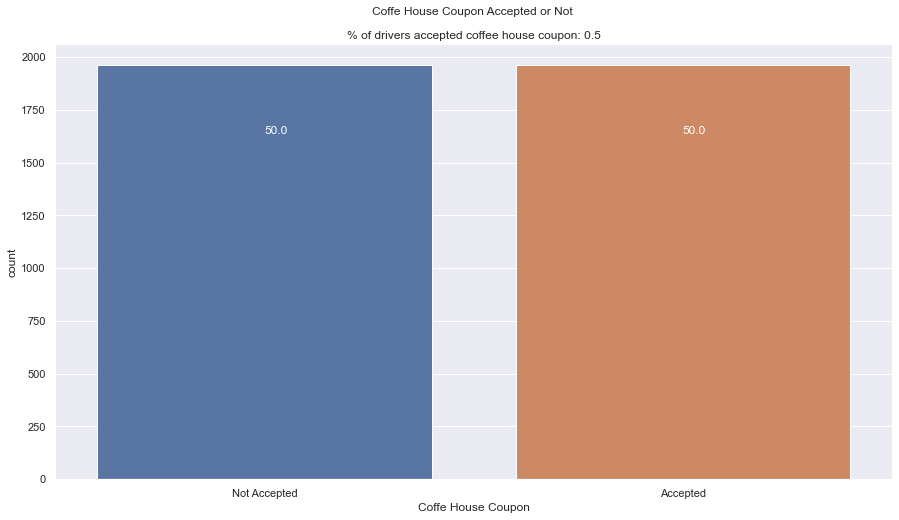

In [31]:
# Print the % of drivers accepted bar coupon
percent_accepted_str = "% of drivers accepted coffee house coupon: "  + str(data_cleaned_coffee.query("Y == 1").shape[0]/data_cleaned_coffee.shape[0])
print(percent_accepted_str)
#plt.figure(figsize=(15,8))
coupon_count_img = sns.countplot(x=data_cleaned_coffee["Y"])
plt.title('Coffe House Coupon Accepted or Not \n\n'+ percent_accepted_str)
coupon_count_img.set_xticks([0.0,1.0])
coupon_count_img.set_xticklabels(['Not Accepted','Accepted'])
plt.xlabel('Coffe House Coupon')
#Call the method to calculate and percentages
percent_display(coupon_count_img, data_cleaned_coffee, 2, 1.2)
plt.show()

2. What proportion of coffee house coupons were accepted by driver 
- Who visited coffee house at least once
- Accompanied by a Friend or Partner 
- Not a Widow

In [32]:
## function that take the value for carry out or take away 
# Return 1.0 if bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
def CoffeeScenarioOne(coffeeHouseVisits, passanger, maritalStatus):
    matches = False 
    if (coffeeHouseVisits in ['4~8', '1~3', 'gt8'])  and (passanger in ['Friend(s)', 'Partner']) and (maritalStatus not in ['Widowed']) :
            matches = True
    return matches    

#Create a new Column with value of 1.0 if the conditions matches else 0.0
data_cleaned_coffee['CoffeeScenarioOne'] = data_cleaned_coffee.apply(lambda x: CoffeeScenarioOne(x['CoffeeHouse'], x['passanger'], x['maritalStatus']), axis=1) 

#Group the data by the new column 
data_cleaned_coffee_groupby = data_cleaned_coffee.groupby('CoffeeScenarioOne')

# Lets get the count 
count_to_scenario_one = data_cleaned_coffee_groupby['Y'].count().reset_index()
# Since the value of accepted is 1.0, summing them will give us the number of rivers accepted the coupon
accepted_to_scenario_one = data_cleaned_coffee_groupby['Y'].sum().reset_index()

#Renaming the Y columns to count and accepted. 
count_to_scenario_one.rename(columns={'Y': 'count'}, inplace = True)
accepted_to_scenario_one.rename(columns={'Y': 'accepted'}, inplace = True)

#Merging the two data sets to one.
coffee_scenario_one = count_to_scenario_one.merge(accepted_to_scenario_one, left_on='CoffeeScenarioOne', right_on='CoffeeScenarioOne', how='inner')
coffee_scenario_one['not accepted'] = coffee_scenario_one['count'] - coffee_scenario_one['accepted']
coffee_scenario_one['percent accepted'] = coffee_scenario_one['accepted'] / coffee_scenario_one['count']

print('\033[1m' +'Data Description' + ': \033[0m')
print('\t \033[1m CoffeeScenarioOne: \033[0m Drivers')
print('\t\twho go to Coffee House more than once, had passengers that Friends or Partner, and were not widowed')
      
print('\t \033[1m count: \033[0m Count of Coffee coupons offered')
print('\t \033[1m accepted: \033[0m Count of Coffee coupons accepted')
print('\t \033[1m not accepted: \033[0m Count of Coffee coupons not accepted')
print('\t \033[1m percent accepted: \033[0m Percent of Coffee coupons accepted')
print('\n\n')
print(coffee_scenario_one)

print('\n\n')
print('\033[1m' +'Data indicates' + ': \033[0m')
print('\tCoffee coupon offered is almost 4 times more to driver who are not matching the scenario')
print('\tNumber of drivers not matching the scenario accepted the coupon is over 3 times the drivers matching scenario')
print('\tBut drivers who matched the scenario are more (close to 2 times) likely to accept the coupon compared to the drivers not matching the scenario')


Data Description: 
	  CoffeeScenarioOne:  Drivers
		who go to Coffee House more than once, had passengers that Friends or Partner, and were not widowed
	  count:  Count of Coffee coupons offered
	  accepted:  Count of Coffee coupons accepted
	  not accepted:  Count of Coffee coupons not accepted
	  percent accepted:  Percent of Coffee coupons accepted



   CoffeeScenarioOne  count  accepted  not accepted  percent accepted
0              False   3200    1407.0        1793.0          0.439688
1               True    724     555.0         169.0          0.766575



Data indicates: 
	Coffee coupon offered is almost 4 times more to driver who are not matching the scenario
	Number of drivers not matching the scenario accepted the coupon is over 3 times the drivers matching scenario
	But drivers who matched the scenario are more (close to 2 times) likely to accept the coupon compared to the drivers not matching the scenario


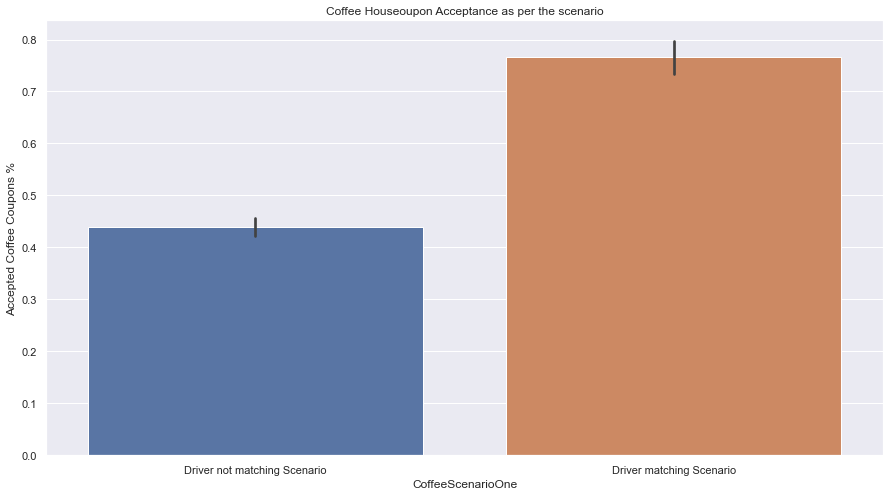

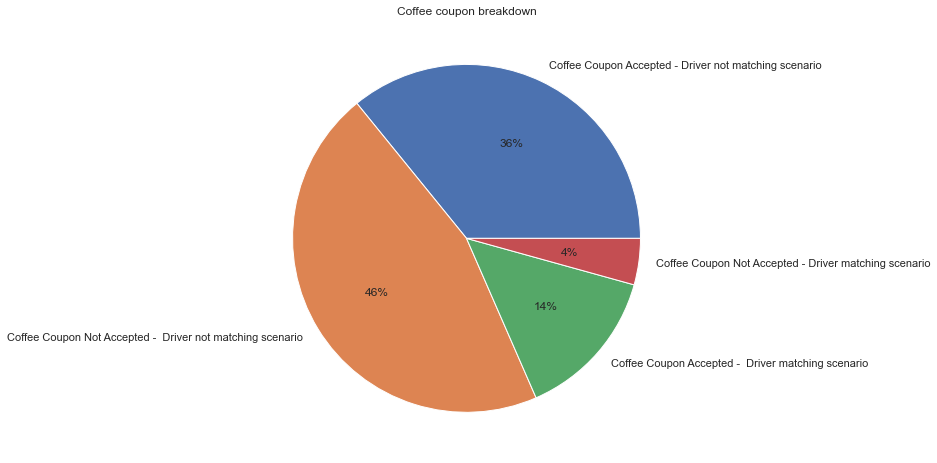

In [33]:
#Vizulizing the same using bar plot
plt.title('Coffee Houseoupon Acceptance as per the scenario')
coffee_scenario_scenario_one_plot = sns.barplot(data=data_cleaned_coffee, x='CoffeeScenarioOne', y ='Y')
coffee_scenario_scenario_one_plot.set_xticks([0.0,1.0])
coffee_scenario_scenario_one_plot.set_xticklabels(['Driver not matching Scenario', 'Driver matching Scenario'])
plt.ylabel("Accepted Coffee Coupons %")
#plt.xlabel("Scenario: drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry", fontsize='large')
plt.show()
print('\n\n')
#Vizulizing the same using pie chart
plt.title('Coffee coupon breakdown')
coffee_accepted_data = [coffee_scenario_one.loc[:0, 'accepted'].values[0], 
                     coffee_scenario_one.loc[:0, 'not accepted'].values[0],
                     coffee_scenario_one.loc[1:, 'accepted'].values[0], 
                     coffee_scenario_one.loc[1:, 'not accepted'].values[0]]
coffee_accepted_labels = ['Coffee Coupon Accepted - Driver not matching scenario', 
                       'Coffee Coupon Not Accepted -  Driver not matching scenario', 
                       'Coffee Coupon Accepted -  Driver matching scenario', 
                       'Coffee Coupon Not Accepted - Driver matching scenario']
coffee_scenario_one_pie = plt.pie(coffee_accepted_data, labels = coffee_accepted_labels, autopct='%.0f%%')
plt.show()

3. What proportion of coffee house coupons were accepted by driver 
- Who visited coffee house at least once
- Not on the way to Home or Office
- Not early morning or in the night (After 7 AM and Before 10 PM)

In [34]:
## function that take the value for carry out or take away 
# Return 1.0 if bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
def CoffeeScenarioTwo(coffeeHouseVisits, destination, time):
    matches = False 
    if (coffeeHouseVisits in ['4~8', '1~3', 'gt8'])  and (destination in ['No Urgent Place']) and (time not in ['7AM', '10PM']) :
            matches = True
    return matches    

#Create a new Column with value of 1.0 if the conditions matches else 0.0
data_cleaned_coffee['CoffeeScenarioTwo'] = data_cleaned_coffee.apply(lambda x: CoffeeScenarioTwo(x['CoffeeHouse'], x['destination'], x['time']), axis=1) 

#Group the data by the new column 
data_cleaned_coffee_groupby = data_cleaned_coffee.groupby('CoffeeScenarioTwo')

# Lets get the count 
count_to_scenario_two = data_cleaned_coffee_groupby['Y'].count().reset_index()
# Since the value of accepted is 1.0, summing them will give us the number of rivers accepted the coupon
accepted_to_scenario_two = data_cleaned_coffee_groupby['Y'].sum().reset_index()

#Renaming the Y columns to count and accepted. 
count_to_scenario_two.rename(columns={'Y': 'count'}, inplace = True)
accepted_to_scenario_two.rename(columns={'Y': 'accepted'}, inplace = True)

#Merging the two data sets to one.
coffee_scenario_two = count_to_scenario_two.merge(accepted_to_scenario_two, left_on='CoffeeScenarioTwo', right_on='CoffeeScenarioTwo', how='inner')
coffee_scenario_two['not accepted'] = coffee_scenario_two['count'] - coffee_scenario_two['accepted']
coffee_scenario_two['percent accepted'] = coffee_scenario_two['accepted'] / coffee_scenario_two['count']

print('\033[1m' +'Data Description' + ': \033[0m')
print('\t \033[1m CoffeeScenarioOne: \033[0m Drivers')
print('\t\twho go to Coffee House more than once, not going to Home or Office, and not early morning or in the night')
      
print('\t \033[1m count: \033[0m Count of Coffee coupons offered')
print('\t \033[1m accepted: \033[0m Count of Coffee coupons accepted')
print('\t \033[1m not accepted: \033[0m Count of Coffee coupons not accepted')
print('\t \033[1m percent accepted: \033[0m Percent of Coffee coupons accepted')
print('\n\n')
print(coffee_scenario_two)

print('\n\n')
print('\033[1m' +'Data indicates' + ': \033[0m')
print('\tCoffee coupon offered is almost 3 times more to driver who are not matching the scenario')
print('\tNumber of drivers not matching the scenario accepted the coupon is almost twice the drivers matching scenario')
print('\tBut drivers who matched the scenario are more (close to 2 times) likely to accept the coupon compared to the drivers not matching the scenario')


Data Description: 
	  CoffeeScenarioOne:  Drivers
		who go to Coffee House more than once, not going to Home or Office, and not early morning or in the night
	  count:  Count of Coffee coupons offered
	  accepted:  Count of Coffee coupons accepted
	  not accepted:  Count of Coffee coupons not accepted
	  percent accepted:  Percent of Coffee coupons accepted



   CoffeeScenarioTwo  count  accepted  not accepted  percent accepted
0              False   2932    1228.0        1704.0          0.418827
1               True    992     734.0         258.0          0.739919



Data indicates: 
	Coffee coupon offered is almost 3 times more to driver who are not matching the scenario
	Number of drivers not matching the scenario accepted the coupon is almost twice the drivers matching scenario
	But drivers who matched the scenario are more (close to 2 times) likely to accept the coupon compared to the drivers not matching the scenario


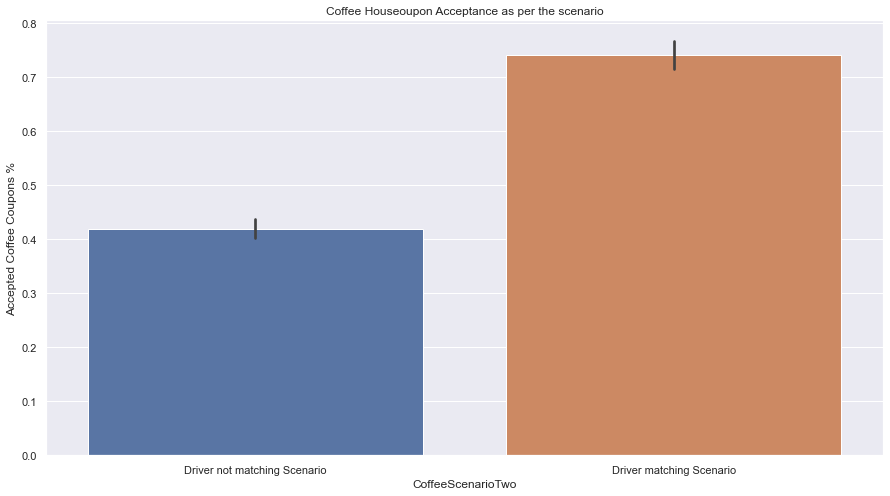

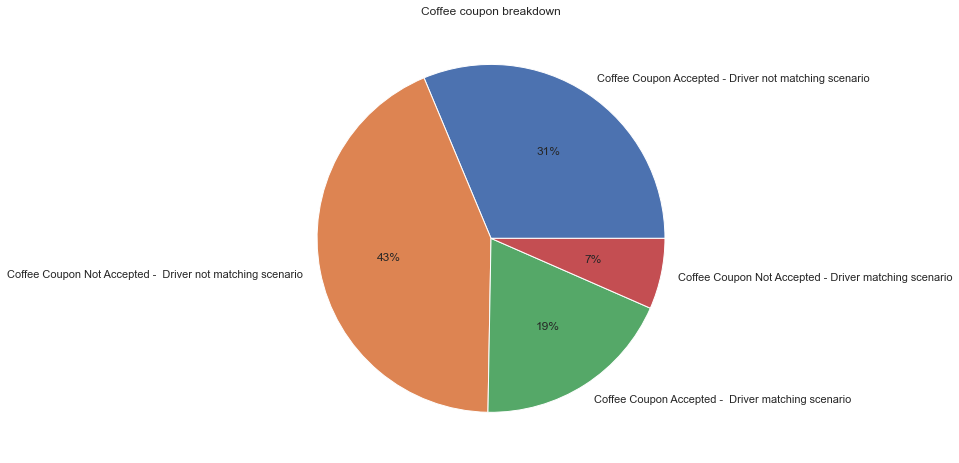

In [35]:
#Vizulizing the same using bar plot
plt.title('Coffee Houseoupon Acceptance as per the scenario')
coffee_scenario_scenario_two_plot = sns.barplot(data=data_cleaned_coffee, x='CoffeeScenarioTwo', y ='Y')
coffee_scenario_scenario_two_plot.set_xticks([0.0,1.0])
coffee_scenario_scenario_two_plot.set_xticklabels(['Driver not matching Scenario', 'Driver matching Scenario'])
plt.ylabel("Accepted Coffee Coupons %")
#plt.xlabel("Scenario: drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry", fontsize='large')
plt.show()
print('\n\n')
#Vizulizing the same using pie chart
plt.title('Coffee coupon breakdown')
coffee_accepted_data = [coffee_scenario_two.loc[:0, 'accepted'].values[0], 
                     coffee_scenario_two.loc[:0, 'not accepted'].values[0],
                     coffee_scenario_two.loc[1:, 'accepted'].values[0], 
                     coffee_scenario_two.loc[1:, 'not accepted'].values[0]]
coffee_accepted_labels = ['Coffee Coupon Accepted - Driver not matching scenario', 
                       'Coffee Coupon Not Accepted -  Driver not matching scenario', 
                       'Coffee Coupon Accepted -  Driver matching scenario', 
                       'Coffee Coupon Not Accepted - Driver matching scenario']
coffee_scenario_two_pie = plt.pie(coffee_accepted_data, labels = coffee_accepted_labels, autopct='%.0f%%')
plt.show()

### Observations
    More number of drivers not matching the driver scenarios have accepted the coffee coupon. 
    Coffee coupons are offered at a higher percentage to drivers not matching the scenario. 
    Based on both scenarios, 70% of driver matching the scenarios accepted the coupons and 40% of drivers not matching the scenario accepted the coupon

### Next steps and recommendations
    Running more scenarios to see certain data combinations along with the number of visits would decrease the acceptance rate.
    While the acceptance rate is higher for the scenarios considered, the volume of data that is matching the data is around 10 - 30 %.
    This could mean that the results could be skewed as less % of data is used. 
    To overcome this one, apply Central Limit Theorem and use the acceptance rates for large sample to have a more confidence acceptance rate data.
